In [2]:
import pandas as pd
churn_data = pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

In [15]:
import plotly
import plotly.express as px
print(plotly.__version__)
# importing the required library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


5.3.1


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
plt.style.use('default')

Text(0.5, 1.0, 'Customer ratio')

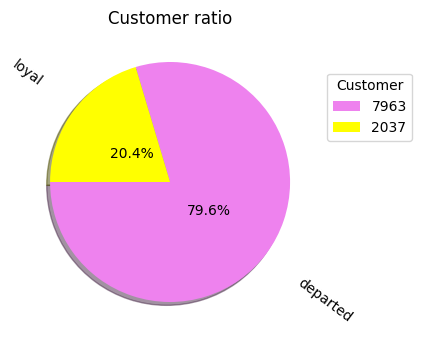

In [7]:
# 9.1. ДИАГРАМА
# Каково соотношение ушедших и лояльных клиентов? 
# Покажите это на графике и дайте комментарий по соотношению.
ratio = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(3, 7))

axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    ratio,
    labels=('departed', 'loyal'),
    shadow = True,
    colors = (['violet', 'yellow', ]),
    pctdistance = 0.4, #distance percents designation from the center of circle 
    labeldistance = 1.3, #distance label designation from the center of circle
    startangle = 180, #rotation by degrees just for fun
    rotatelabels = True, #rotation of labels just for fun
    autopct='%.1f%%',
    explode = [0, 0]
); 
axes.legend(ratio,
            title = 'Customer',
            loc = 'center left',
            bbox_to_anchor = (1, 0, 0.5, 1.5))
axes.set_title('Customer ratio')



In [8]:
grouped_country = churn_data.groupby(['Exited'])[['Exited', 'Rich']].sum()
#grouped_country = grouped_country.nlargest(10, columns=['Rich'])
grouped_country.plot(
  kind='bar',
  grid=True,
  figsize=(12, 4),
);


KeyError: "Columns not found: 'Rich'"

In [10]:
#ГИСТОГРАММА
#9.2. Постройте график, показывающий распределение баланса пользователей, 
# у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

histogram_data = churn_data[churn_data['Balance']>2500]
fig = px.histogram(
    data_frame = histogram_data,
    x = 'Balance',
    height=300,
    width=700,
    title='Распределение баланса на счетах в банке (>2500$)',
)
fig.show()

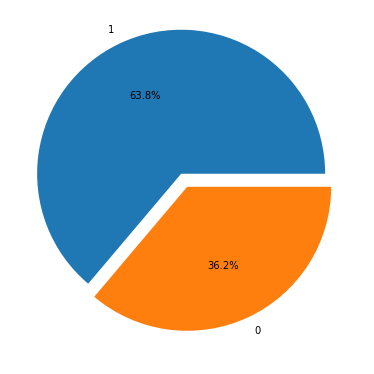

In [ ]:
#9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
Rich_combinations = churn_data['Rich'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    Rich_combinations,
    labels= Rich_combinations.index,
    autopct='%.1f%%',
    explode = [0.1, 0]
);





In [12]:
##9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока.
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.
fig = px.box(
    data_frame = churn_data,
    x = 'Balance',
    color='Exited',
    height=300,
    width=700,
    title='Распределение баланса на счетах в банке по группам',
)
fig.show()
## почти 5000 клиентов имеют на счету больше 2500$
#почти 1500 покинувших банк клиентов имели на счету больше 2500$

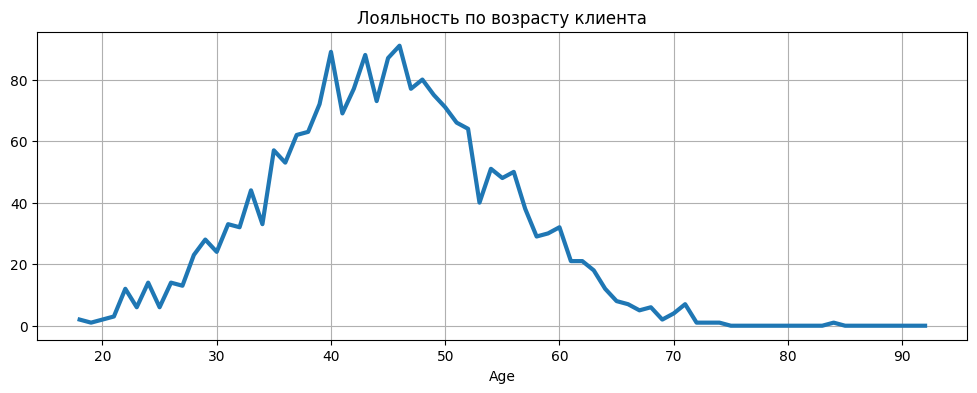

In [13]:
#9.4. Посмотрите на распределение возраста в разрезе признака оттока. 
# В какой группе больше потенциальных выбросов?
# На какую возрастную категорию клиентов стоит обратить внимание банку?
grouped_age = churn_data.groupby('Age')['Exited'].sum()
grouped_age.plot(
  kind='line',
  figsize=(12, 4),
  title='Лояльность по возрасту клиента',
  grid = True,
  lw=3
);

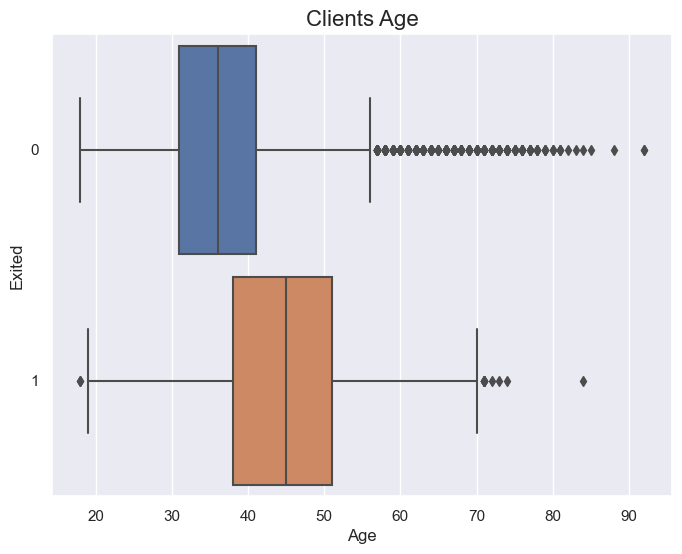

In [17]:
#9.5. Постройте график, который показывает взаимосвязь
# кредитного рейтинга клиента и его предполагаемой зарплаты.
# Добавьте расцветку по признаку оттока клиентов. 
# Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.
# chart size and
# display style
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
# construction of a box plot by exited clients
dx = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9,
)
# axle marking
dx.set_title('Clients Age', fontsize=16)
# display graph
plt.show()


In [21]:
px.pie(
data_frame = churn_data,
values = 'Exited',
names = 'Gender',
height = 300, 
width = 700,
title = 'sex correlation'
)

In [ ]:
#9.7
# the number of non-blank values in the row_number column in each group
bar_data = churn_df.groupby(['NumOfProducts', 'Loyal'], as_index=False).count()
# construction of layered bar chart
px.bar(
    data_frame=bar_data,
    x='NumOfProducts',
    y='RowNumber',
    color='Loyal',
    height=400,
    width=600,
    title='Number of Purchased Bank Services'
)